# **Plasmodium Vivax (malaria) parasite detector and counter**

## **1.0 Introduction**

## **1.1 Problem Statement**

## **1.2 Objectives**

1. To detect Plasmodium Vivax (malaria parasite) in human cells
2. To count the number of detected plasmodium vivax parasites per image

## **1.3 Installing & Importing Required Libraries**

In [1]:
!pip install Pillow #installing PILLOW LIBRARY


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import os #
import json # 
from pprint import pprint #
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## **1.4 Loading & Understanding Malaria Dataset structure**

In [7]:
# Check current directory
print("Current directory:", os.getcwd())

# List files and folders
print("Contents here:", os.listdir())

# If you see 'images', list inside it
if 'images' in os.listdir():
    print("Example image files:", os.listdir('images')[:10])

Current directory: /Users/h.nderitu/Documents/Data Science Material/Capstone Project/data_science_capstone_project
Contents here: ['.DS_Store', 'malaria_parasite_detection_count.ipynb', 'malaria', 'README', '.git']


In [8]:
# Look inside the malaria folder
print("Contents of malaria/:", os.listdir("malaria"))

Contents of malaria/: ['.DS_Store', 'training.json', 'images', 'test.json']


In [10]:
# Load and inspect training JSON file
with open('/Users/h.nderitu/Documents/Data Science Material/Capstone Project/data_science_capstone_project/malaria/training.json'r'') as f:
    data = json.load(f) # convert JSON into a detection dataset

# # Inspect the first few entries& pretty-print the contents
for obj in data[:2]:
    pprint(obj)

{'image': {'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
           'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
           'shape': {'c': 1600, 'channels': 3, 'r': 1200}},
 'objects': [{'bounding_box': {'maximum': {'c': 1540, 'r': 1158},
                               'minimum': {'c': 1440, 'r': 1057}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1403, 'r': 971},
                               'minimum': {'c': 1303, 'r': 868}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1008, 'r': 689},
                               'minimum': {'c': 900, 'r': 578}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 713, 'r': 408},
                               'minimum': {'c': 611, 'r': 304}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1003, 'r': 312},
                               'minimu

The file defines object detection annotations. Each record/entry includes a category, a bounding box with maximum and minimum and corresponds to an image.

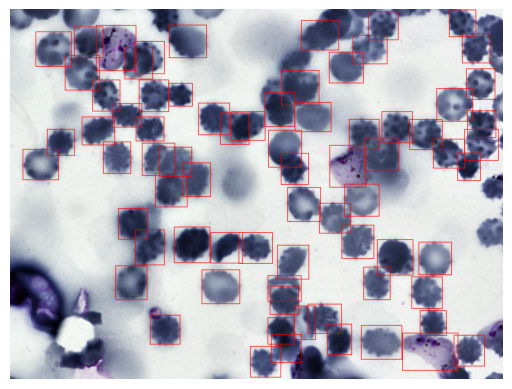

In [11]:
# Visualize one image and its bounding boxes
base_path = "malaria/images/"

# pick one image
sample = data[0]

# build full image path
img_path = os.path.join(base_path, os.path.basename(sample['image']['pathname']))

# open and draw bounding boxes
img = Image.open(img_path)
draw = ImageDraw.Draw(img)
for obj in sample['objects']:
    box = obj['bounding_box']
    xmin, ymin = box['minimum']['c'], box['minimum']['r']
    xmax, ymax = box['maximum']['c'], box['maximum']['r']
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)

plt.imshow(img)
plt.axis('off')
plt.show()

This confirms that the JSON annotations match the images.